In [1]:
!pip install sklearn

Looking in indexes: https://pypi.douban.com/simple


In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [4]:
random_data = np.random.random((20, 2))

In [5]:
random_data

array([[0.62873375, 0.77717626],
       [0.09544056, 0.45335926],
       [0.34741544, 0.10827379],
       [0.65973327, 0.84764952],
       [0.9172944 , 0.31051861],
       [0.83710219, 0.89169362],
       [0.38931865, 0.50964596],
       [0.84832437, 0.77986877],
       [0.11347984, 0.03964016],
       [0.85464022, 0.02841996],
       [0.66880489, 0.51429688],
       [0.49920972, 0.56744941],
       [0.67977209, 0.75662063],
       [0.46182229, 0.81312397],
       [0.65323717, 0.32792495],
       [0.63288824, 0.30091937],
       [0.41177059, 0.29838404],
       [0.18779107, 0.12959541],
       [0.43890019, 0.60198114],
       [0.18861186, 0.83426857]])

In [6]:
import matplotlib.pyplot as plt

In [7]:
X = random_data[:, 0]

In [8]:
y = random_data[:, 1]

In [9]:
import random

In [12]:
def assmuing_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + random.randint(-5, 5)

In [13]:
y = [assmuing_function(x) for x in X]

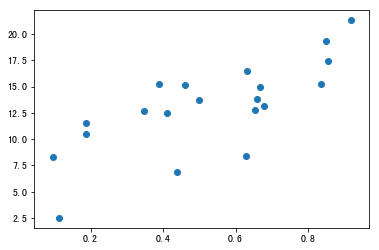

In [14]:
plt.scatter(X, y)

In [15]:
y = np.array(y)

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [18]:
reg.score(X.reshape(-1, 1), y)

0.5541609865619558

In [19]:
reg.coef_

array([12.77770794])

In [20]:
reg.intercept_

6.377147984042828

In [21]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

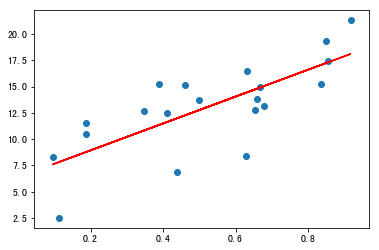

In [22]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

# How to implement a KNN model

In [23]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [24]:
from scipy.spatial.distance import cosine

In [25]:
def distance(x1, x2):
    return cosine(x1, x2)

In [26]:
def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    # 已经获得了最相似的数据集
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了 
    

## How to implement a Decision Tree

In [39]:
from collections import Counter

In [40]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in elements]
    return - sum(p * np.log(p) for p in probs)

In [64]:
entropy([1, 1, 1, 1])

-0.0

In [65]:
entropy([1, 1, 1, 0])

0.4316271552006655

In [66]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [67]:
import pandas as pd

In [68]:
dataset = pd.DataFrame.from_dict(mock_data)

In [69]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [70]:
set(mock_data['family_number'])


{1, 2}

In [71]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [91]:
sub_split_1

[1, 1, 0, 0, 0]

In [94]:
sub_split_2

[1, 1]

In [93]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [96]:
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()

In [97]:
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()

In [98]:
_sub_split_1

[0, 0, 1]

In [99]:
_sub_split_2

[1, 1, 1, 0]

In [100]:
entropy(_sub_split_1) + entropy(_sub_split_2)

0.825455918848128

In [73]:
entropy(sub_split_1) + entropy(sub_split_2)

0.7176797562470717

In [74]:
dataset.columns.tolist()

['gender', 'income', 'family_number', 'bought']

In [102]:
from icecream import ic

In [119]:
def find_the_min_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [120]:
find_the_min_spilter(dataset, 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.7176797562470717
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: -0.0
ic| entropy_v: 0.7176797562470717
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0.7176797562470717
ic| entropy_v: 0.7176797562470717
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.7176797562470717
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: -0.0
ic| entropy_v: 0.7176797562470717
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0.7176797562470717
ic| entropy_v: 0.7176797562470717
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.4316271552006655
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0.39382876364746244
ic| entropy_v: 0.825455918848128
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.39382876364746244
ic| sub_split_2: [1, 1, 1, 0]
ic| entro

spliter is: ('family_number', 2)
the min entropy is: 0.7176797562470717


('family_number', 2)

In [122]:
dataset[dataset['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [123]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [124]:
find_the_min_spilter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.4316271552006654
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: -0.0
ic| entropy_v: 0.4316271552006654
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0.4316271552006654
ic| entropy_v: 0.4316271552006654
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.7176797562470717
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0
ic| entropy_v: 0.7176797562470717
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.39382876364746244
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: -0.0
ic| entropy_v: 0.39382876364746244
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0.39382876364746244
ic| entropy_v: 0.39382876364746244


spliter is: ('gender', 'M')
the min entropy is: 0.39382876364746244


('gender', 'M')

In [125]:
sub_df = dataset[dataset['family_number'] == 1]

In [126]:
sub_df[sub_df['gender'] == 'M']

,gender,income,family_number,bought
4,M,+10,1,0
5,M,+10,1,0


In [127]:
sub_df[sub_df['gender'] != 'M']

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0


In [128]:
find_the_min_spilter(sub_df[sub_df['gender'] != 'M'], 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.3010299956639812
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: -0.0
ic| entropy_v: 0.3010299956639812
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0.3010299956639812
ic| entropy_v: 0.3010299956639812
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.39382876364746244
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0
ic| entropy_v: 0.39382876364746244
ic| f: 'gender'
ic| values: {'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.39382876364746244
ic| sub_split_2: [1, 1, 1, 0]
ic| entropy_2: 0
ic| entropy_v: 0.39382876364746244


spliter is: ('income', '-10')
the min entropy is: 0.3010299956639812


('income', '-10')

## A simple example of kmeans

In [27]:
from sklearn.cluster import KMeans

In [28]:
X = [random.randint(0, 100) for _ in range(100)]
Y = [random.randint(0, 100) for _ in range(100)]

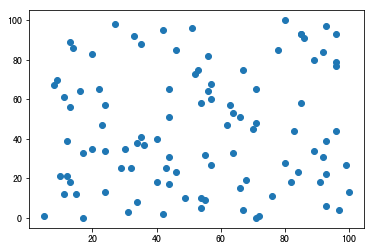

In [29]:
plt.scatter(X, Y)

In [30]:
tranning_data = [[x, y] for x, y in zip(X, Y)]

In [31]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [32]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
cluster.cluster_centers_

array([[60.66666667, 60.83333333],
       [25.24      , 24.48      ],
       [24.        , 78.25      ],
       [88.72727273, 88.36363636],
       [58.75      , 13.625     ],
       [90.85714286, 25.07142857]])

In [34]:
cluster.labels_

array([3, 4, 5, 1, 1, 0, 5, 1, 2, 0, 4, 3, 0, 5, 1, 2, 5, 0, 4, 4, 0, 2,
       1, 0, 1, 1, 3, 5, 4, 4, 0, 0, 1, 5, 0, 0, 5, 0, 3, 0, 1, 4, 2, 4,
       1, 1, 4, 0, 0, 1, 1, 2, 4, 1, 4, 5, 3, 0, 0, 5, 3, 1, 2, 1, 1, 2,
       1, 2, 5, 2, 1, 3, 5, 5, 2, 2, 3, 1, 5, 5, 4, 4, 2, 2, 2, 2, 1, 1,
       1, 3, 1, 2, 1, 4, 4, 3, 4, 0, 0, 3], dtype=int32)

In [35]:
from collections import defaultdict

In [36]:
centers = defaultdict(list)

In [37]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

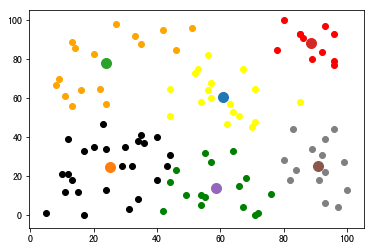

In [38]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)